In [ ]:
#wczytanie danych
path1 = "https://raw.githubusercontent.com/Kamil128/SDA_Excercise/main/data/employee/df2.csv"
path2 = "https://raw.githubusercontent.com/Kamil128/SDA_Excercise/main/data/employee/df1.csv"
path3 = "https://raw.githubusercontent.com/Kamil128/SDA_Excercise/main/data/employee/attrition.csv"

In [ ]:
#biblioteki 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#przypisanie zmiennych do ścieżek 
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)
data3 = pd.read_csv(path3)

In [ ]:
#łączenie tabel za pomocą join() i set_index()
table=data1.set_index('EmployeeNumber').join(data2.set_index('EmployeeNumber'))

In [ ]:
#resetowanie indeksu za pomocą reset_index()
table.reset_index(inplace=True) #resetowanie indeksu, nie trzeba zapisywac do zmiennej z inplace=True

In [ ]:
#usuwanie wartości NaN
table_drop=table.dropna()
table_drop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Over18                    4302 non-null   object 
 2   OverTime                  4302 non-null   object 
 3   PercentSalaryHike         4302 non-null   float64
 4   PerformanceRating         4302 non-null   float64
 5   RelationshipSatisfaction  4302 non-null   float64
 6   StandardHours             4302 non-null   float64
 7   StockOptionLevel          4302 non-null   float64
 8   TotalWorkingYears         4302 non-null   float64
 9   TrainingTimesLastYear     4302 non-null   float64
 10  WorkLifeBalance           4302 non-null   float64
 11  YearsAtCompany            4302 non-null   float64
 12  YearsInCurrentRole        4302 non-null   float64
 13  YearsSinceLastPromotion   4302 non-null   float64
 14  YearsWit

In [ ]:
# def drop_na(table):
#   table_drop=table.dropna()
#   return table

# drop_na(table)

In [ ]:
# Usunięcie niepotrzebnych kolumn (z 1 wartością)

col_to_drop = ['Over18', 'StandardHours',"EmployeeCount"]
table_drop.drop(col_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
table_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   OverTime                  4302 non-null   object 
 2   PercentSalaryHike         4302 non-null   float64
 3   PerformanceRating         4302 non-null   float64
 4   RelationshipSatisfaction  4302 non-null   float64
 5   StockOptionLevel          4302 non-null   float64
 6   TotalWorkingYears         4302 non-null   float64
 7   TrainingTimesLastYear     4302 non-null   float64
 8   WorkLifeBalance           4302 non-null   float64
 9   YearsAtCompany            4302 non-null   float64
 10  YearsInCurrentRole        4302 non-null   float64
 11  YearsSinceLastPromotion   4302 non-null   float64
 12  YearsWithCurrManager      4302 non-null   float64
 13  Attrition                 4302 non-null   object 
 14  YearlyIn

In [ ]:
# Definiowanie zmiennej zależnej y i zmiennych niezależnych x
X=table_drop.drop(['Attrition'],axis=1) 
y=table_drop['Attrition']

Text(0.5, 1.0, 'Employee Attrition (Amount)')

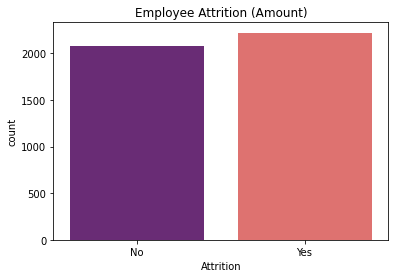

In [ ]:
#sprawdzenie czy nasz zbiór jest zbalansowany
sns.countplot(x='Attrition', data=table_drop,palette="magma")
plt.title('Employee Attrition (Amount)')

In [ ]:
#sprawdzenie korelacji danych  
count_corr=table_drop.corr()
fig = px.imshow(count_corr)
fig.update_layout(
    title="Correlation of numerical features",
    xaxis_nticks=60)
fig.show()
#większość kolumn jest ze sobą słabo skorelowana 

In [ ]:
#wykres
mean_income = table_drop.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().reset_index()

fig = px.bar(mean_income, x="JobRole", y="MonthlyIncome",
             color='Attrition', barmode='group',
             height=400, width=600)
fig.update_layout(title= "Average income by job role and attrition status")



In [ ]:
#wykres
mean_income = table_drop.groupby(['Gender', 'Attrition'])['MonthlyIncome'].mean().reset_index()

fig = px.bar(mean_income, x="Gender", y="MonthlyIncome",
             color='Attrition', barmode='group',
             height=400, width=500)
fig.update_layout(title= "Average income by gender and attrition status")

In [ ]:
mean_years=table_drop.groupby(['YearsAtCompany', 'Attrition'])['YearsSinceLastPromotion'].mean().reset_index()
px.scatter(table_drop, x='YearsAtCompany', y='YearsSinceLastPromotion',
            color='Attrition',size_max=60,log_x=True,log_y=True)


In [ ]:
table_drop['YearsAtCompany'].unique()

array([1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       2.000e+01, 0.000e+00, 3.000e+00, 1.400e+01, 8.000e+00, 2.400e+01,
       6.000e+00, 4.000e+00, 1.100e+01, 1.500e+01, 1.300e+01, 2.100e+01,
       3.600e+01, 2.600e+01, 1.900e+01, 1.600e+01, 2.200e+01, 1.800e+01,
       2.500e+01, 1.700e+01, 1.200e+01, 3.700e+01, 3.300e+01, 4.000e+01,
       3.400e+01, 2.300e+01, 2.900e+01, 3.100e+01, 3.200e+01, 2.700e+01,
       3.000e+01, 5.078e+03, 7.345e+03, 3.079e+03, 2.332e+03, 1.761e+03,
       1.378e+03, 8.870e+03, 4.879e+03, 9.445e+03, 2.265e+03, 5.801e+03,
       8.553e+03, 3.761e+03, 2.051e+03, 7.735e+03, 2.506e+03, 9.066e+03,
       3.335e+03, 1.621e+03, 8.120e+03, 3.743e+03, 9.681e+03, 6.797e+03,
       3.707e+03, 7.547e+03, 6.133e+03, 3.177e+03, 3.549e+03, 8.717e+03,
       1.036e+03, 9.508e+03, 1.488e+03, 5.359e+03, 2.744e+03, 5.581e+03,
       9.676e+03, 1.286e+03, 5.904e+03, 1.872e+03, 4.763e+03, 7.324e+03,
       6.140e+03, 3.687e+03, 1.420e+03, 9.767e+03, 

Budowanie modelu

In [ ]:
#importowanie potrzebnych bibliotek
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer #rozbija dataset wzdgledem nazwy kolumn, zaimplementuj cos tylko do num col a cos tylko do cat column
from sklearn.model_selection import train_test_split



In [ ]:
#Podział na zbiór testowy i treningowy

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)
#stratify=y (wartość domyślna)
#shuffle=True (wartość domyślna)

In [ ]:
#podzial na atrubyty numeryczne i kategoryczne do pipeline'u
num_att=X_train.select_dtypes(include='number').columns
cat_att=X_train.select_dtypes(exclude='number').columns

In [ ]:
##tworzenie pipelinu dla danych numerycznych z użyciem StandardScaler
num_pipeline=Pipeline(
    [
     ('std_scaler',StandardScaler())
    ]
)

#tworzenie pipelinu dla danych kategorycznych z użyciem OHE
cat_pipeline=Pipeline(
    [
     ('ohe',OneHotEncoder()),
    ]
)

#połączenie
cat_num_pipeline = ColumnTransformer( #do polaczenia dwoch kolumn
    [
     ('numerical',num_pipeline, num_att),
     ('categorical',cat_pipeline, cat_att)
    ]
)


In [ ]:
#wyświetlenie pipeline'ów
pd.DataFrame(cat_num_pipeline.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.088181,0.253702,-0.406031,-0.668276,0.246419,-0.218640,0.157316,0.333029,-0.228255,-0.242718,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.505423,-1.131554,-0.406031,1.186937,-0.929625,-0.227444,-0.612704,0.333029,-0.231107,-0.246148,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.850888,0.807804,-0.406031,1.186937,-0.929625,-0.207804,-0.612704,1.735666,-0.209714,-0.242718,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.119585,0.530753,-0.406031,1.186937,0.246419,1.003812,1.697356,-1.069607,-0.230394,-0.245462,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.198429,1.361907,2.462866,0.259331,-0.929625,-0.214576,-1.382724,-1.069607,-0.223976,-0.239287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,0.864981,-0.300401,-0.406031,-1.595882,1.422463,-0.222026,0.157316,0.333029,-0.226116,-0.241345,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3437,-1.237515,-0.023349,-0.406031,-0.668276,-0.929625,-0.211867,1.697356,-2.472243,-0.214706,-0.247521,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3438,0.730909,-1.131554,-0.406031,-1.595882,-0.929625,1.618763,0.927336,-2.472243,-0.229681,-0.245462,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3439,0.989912,-1.131554,-0.406031,1.186937,-0.929625,-0.223381,-0.612704,0.333029,-0.226116,-0.245462,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
cat_num_pipeline.transform(X_test)

array([[-1.78903958, -0.30040052, -0.40603104, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15026513,  1.36190693,  2.4628659 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.08568606, -0.57745176, -0.40603104, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.14074296, -0.854503  , -0.40603104, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87183676,  0.80780445, -0.40603104, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.43991094, -1.13155424, -0.40603104, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X_tr = cat_num_pipeline.fit_transform(X_train) #zapis do zmiennej
X_tr

array([[ 1.08818056,  0.25370197, -0.40603104, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5054235 , -1.13155424, -0.40603104, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.85088798,  0.80780445, -0.40603104, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.73090858, -1.13155424, -0.40603104, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.98991172, -1.13155424, -0.40603104, ...,  0.        ,
         0.        ,  1.        ],
       [-1.13162868, -0.57745176, -0.40603104, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:

#https://colab.research.google.com/drive/1gT4L7ZaUOCTdkT2m7lZUJILAx5jVmssO#scrollTo=y973DMYT5Ru1

#regresja logistyczna - czy najlepsza?? Jaki model do tych danych?
#sprawdzmy korelacje
#jak zwizualizowac wyniki?



In [ ]:
#przyklady na kaggle
#https://www.kaggle.com/code/janiobachmann/attrition-in-an-organization-why-workers-quit/notebook
#https://www.kaggle.com/code/arthurtok/employee-attrition-via-ensemble-tree-based-methods/notebook